
# <span style="color:rgb(213,80,0)">**SPR Biosensor : 2D Grating**</span>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 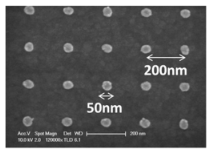        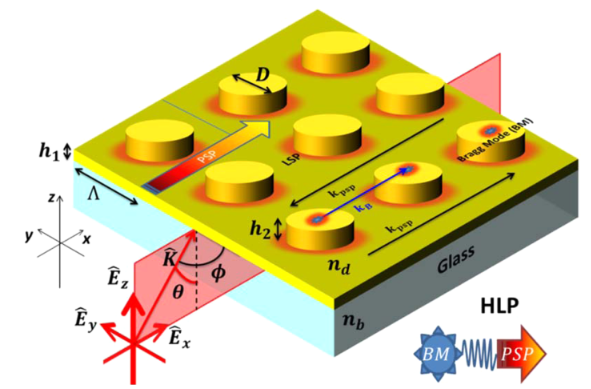


[Hybrid Plasmonic Mode by Resonant Coupling of Localized Plasmons to Propagating Plasmons in a Kretschmann Configuration](https://hal-iogs.archives-ouvertes.fr/hal-01307382)


Mitradeep Sarkar, Mondher Besbes, Julien  Moreau, Jean\-François Bryche, Aurore Olivéro, Grégory Barbillon,  Anne\-Lise Coutrot, Bernard Bartenlian, Michael Canva


 *ACS photonics*, 2015, 2 (2), pp.237\-245.

## Data


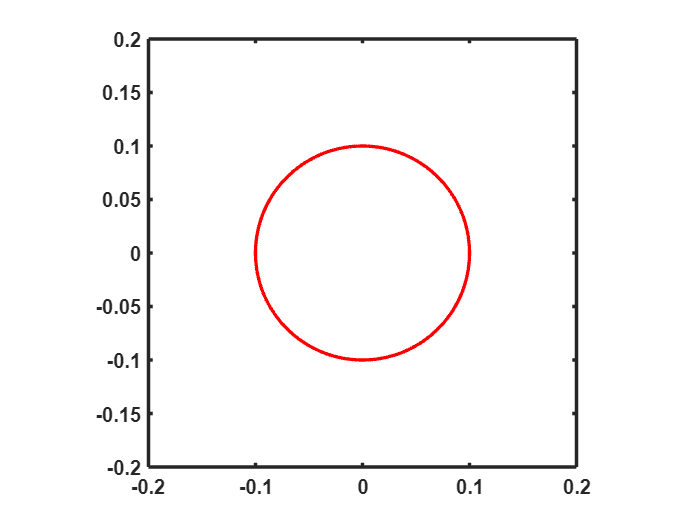

In [1]:
% Refractive indices
n_H2O = 1.333;
%  {supstrat {grating} layers substrat}
index = {n_H2O , {IndexVal('Au') n_H2O}, IndexVal('Au'), IndexVal('SF10')};
%
% Geometry (µm)
h1 = 0.015; % Grating thickness (µm)
h2 = 0.045; % Gold layer thickess
dx = 0.4;  % Period x-axis
dy = dx;  % Period y-axis
a = dx/4;  % Half the width of the nanoparticle x-axis
b = dx/4;  % Half the width of the nanoparticle y-axis
%
% SuperFormula parameters
% mn = [m, n1, n2, n3]  ; ab = [rx ry]
% [4 1 1 1] : Diamond
% [4 2 2 2] : Circle or ellipse
% [4 n n n] : n>2 rounded square or rectangle
% [3 n 2*n 2*n] : rounded triangle n>1
% mn = 4 : Rectangle or square
%
geom = SetGeom('dx',dx,'dy',dy,'hc',[h1, h2],...
               'mn',{[4 2 2 2]  []},'ab',{[a b] []},...
               'npx',{[41 2] ,2},'npy',{[41 2] ,2},'npz',{2 , 2},'Plot',1);

## Spectrum Computation versus incident angle

In [2]:
% Incident Plane Wave
lambda = .85;                       % Wavelength(µm)
theta = linspace(50,58,121)*pi/180;  % Incident angle (rd)
inc = -1;                           % inc = -1: from down, +1: from top
%
% Spectrum Computation versus incident angle (theta) for a defined wavelength
tic
%[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',8,'my',8,'SymY',2);
[R_tm,T_tm,R_te,T_te] = Spectrum(index,geom,lambda,theta,inc,'mx',8,'my',8,'Nsub',[1 0]); t = toc

t = 0.0929


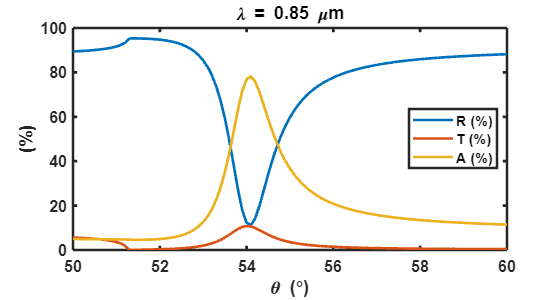

In [3]:

%
% Plot Reflection versus incident angle in TM polarisation
figure('Position',[300  300  560  300]),
PlotCoefRTA(lambda,theta,R_tm,T_tm,1-R_tm-T_tm),

## Field Computation


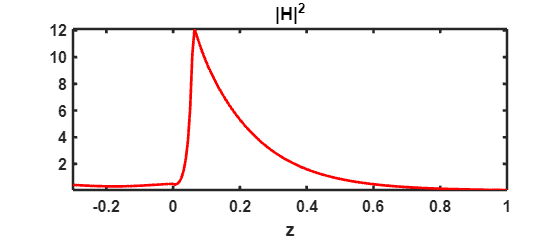

In [4]:
lambda = 0.85;
theta = 54.7*pi/180;
inc = -1;           % inc = -1: from down, +1: from up
%
% S-matrix calculation
s = Spectrum(index,geom,lambda,theta,inc,'mx',8,'my',8);
%
% Field calculation
[x,y,z] = deal(0,0,linspace(-.3,1,201)); % along z-axis
[E,H] = CalculFieldFMM(s,x,y,z);

% Plot Field distribution
figure('Position',[300  300  560  240]),
VisuFieldFMM(sum(abs(H(:,1:3)).^2,2),x,y,z), axis tight,title('|H|^2')

## Field Distribution at plan (xOz)

In [5]:
% Field calculation
[x,y,z] = deal(linspace(-dx,dx,100),0,linspace(0,.2,101)); % (xoz)
tic, [E,H] = CalculFieldFMM(s,x,y,z);  toc

Elapsed time is 1.422512 seconds.


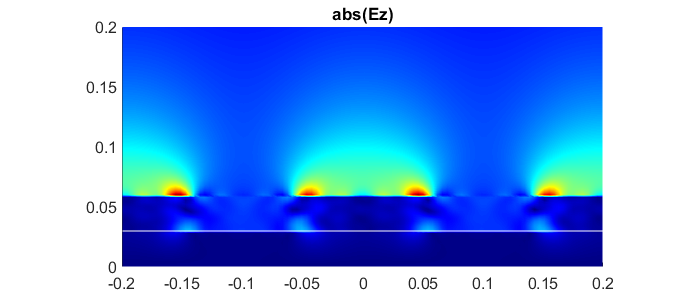

In [6]:

% Plot Field distribution
figure('Position',[300  300  560  240]), hold on
VisuFieldFMM(abs(E(:,3)),x,y,z), axis tight,title('abs(Ez)')
plot([min(x) max(x)],[0 0],'w',[min(x) max(x)],[h2 h2],'w') % Gold layer

## Field Distribution at plan (xOy)


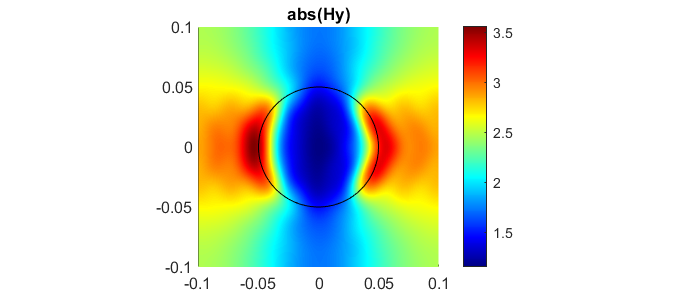

In [7]:
% Field calculation
[x,y,z] = deal(linspace(-dx/2,dx/2,100),linspace(-dy/2,dy/2,101),h1/2+h2); % (xoy)
[E,H] = CalculFieldFMM(s,x,y,z);

%% Plot Field distribution
figure('Position',[300  300  560  240]), hold on
VisuFieldFMM(abs(H(:,2)),x,y,z), axis tight,title('abs(Hy)'), colorbar
plot(s.Mesh(2).xv,s.Mesh(2).yv,'k') % Nanoparticle

## Test of convergence


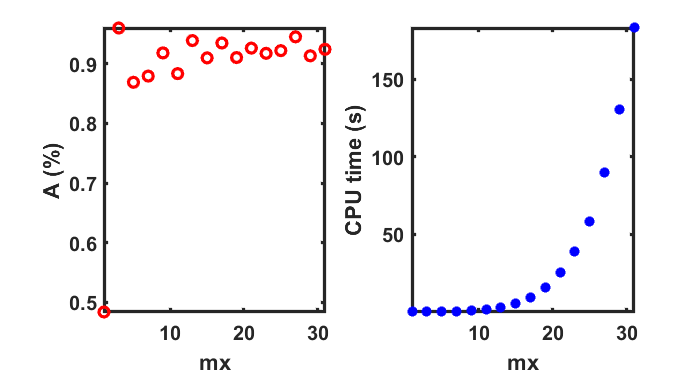

In [8]:
% Incident Plane Wave
lambda = 0.85;
theta = 60*pi/180;
inc = -1;           % inc = -1: from down, +1: from up
%
TabM = 1:2:31;      % Number of Fourier terms
[A,t] = deal(zeros(size(TabM)));
%
figure('Position',[300  300  560  300]), hold on
%
for k = 1:length(TabM)
    mxy = TabM(k);
    tic, [R,T] = Spectrum(index,geom,lambda,theta,inc,'mx',mxy,'my',mxy,'SymY',0); t(k) = toc;
    % A=1-R-T
    if length(R) == 1  % SymY = 0 or 1
        A(k) = 1-R-T;
    else  % SymY = 2 (default value)
        A(k) = 1-(R(1)+R(2))-(T(1)+T(2)); % for TM
        %A(k) = 1-(R(3)+R(4))-(T(3)+T(4)); % for TE
    end
    subplot(121),hold on, PlotCourbe(TabM(k),A(k),'mx','A (%)','','or'), drawnow
    subplot(122),hold on, PlotCourbe(TabM(k),t(k),'mx','CPU time (s)','','*b'), drawnow
end